# Лабораторная работа №2 (Машинное обучение)
## Выполнил Неженский Михаил Сергеевич, 6133-010402D

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Используемый в работе набор данных: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset. Будем основываться в исследовании на более реальных данных, чем на собственно сгенирированных. Была решена задача определения диабета у человека по его показателям с помощью методов KNeighborsClassifier и RandomForest

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix

In [3]:
diabetes = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(diabetes)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Избавимся от нечисловых данных

In [4]:
data_new = data.select_dtypes(include=np.number)
data_new.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [5]:
df = data_new.dropna(how='any',axis=0) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 5.3 MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Будем определять болен человек диабетом в зависимости от его показателей или нет

In [8]:
# Выделение целевой переменной

Y = df.diabetes
X = df.drop('diabetes', axis=1)

In [9]:
# Делим на обучающую и тестовую

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1234)

In [10]:
# Нормализация значений

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2) Воспользуемся методом k-близжайших соседей

In [11]:
# Классификатор k-соседей

from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Например для 11 соседей
   
model_KNN = KNeighborsClassifier(n_neighbors = 11)
    
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)
  
accuracy_score(Y_test, Y_KNN) 

0.967

Отличный результат!

Воспользуемся контейнером

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
scaler = StandardScaler()
KNN = KNeighborsClassifier()

steps = [('normalizer', scaler), ('KNN', KNN)]
pipe = Pipeline(steps)

Найдем лучшие гиперпараметры

In [15]:
from sklearn.model_selection import GridSearchCV

In [38]:
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 16), 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe, params_KNN)

In [39]:
grid_search_KNN.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'KNN__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [40]:
print(grid_search_KNN.score(X_test, Y_test))

grid_search_KNN.best_params_

0.9667


{'KNN__algorithm': 'ball_tree', 'KNN__n_neighbors': 9}

## 2) Теперь воспользуемся методом случайного леса

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
RFC = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 38)
RFC.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=38)

In [21]:
accuracy_score(Y_test, RFC.predict(X_test))

0.96765

Нормализуем данные

In [22]:
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

Найдем наилучшие гиперпараметры

In [32]:
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 30),
     'RFC__criterion': ['gini', 'entropy'],
     'RFC__max_features': ['auto', 'sqrt', 'log2']}


In [33]:
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)

In [34]:
import warnings

In [35]:
warnings.filterwarnings('ignore')

In [36]:
grid_search_RFC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('RFC',
                                        RandomForestClassifier(criterion='entropy',
                                                               n_estimators=8,
                                                               random_state=38))]),
             param_grid={'RFC__criterion': ['gini', 'entropy'],
                         'RFC__max_features': ['auto', 'sqrt', 'log2'],
                         'RFC__n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])})

In [37]:
print(grid_search_RFC.score(X_test, Y_test))

grid_search_RFC.best_params_

0.96945


{'RFC__criterion': 'entropy',
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 28}

## Как видно, самый лучший результат получился в последнем эксперименте при использовании метода случайного леса

In [42]:
print(RFC.feature_importances_)

[0.15026051 0.00943554 0.00571883 0.15409014 0.39177346 0.28872153]


In [43]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'age'),
  Text(1, 0, 'hypertension'),
  Text(2, 0, 'heart_disease'),
  Text(3, 0, 'bmi'),
  Text(4, 0, 'HbA1c_level'),
  Text(5, 0, 'blood_glucose_level')])

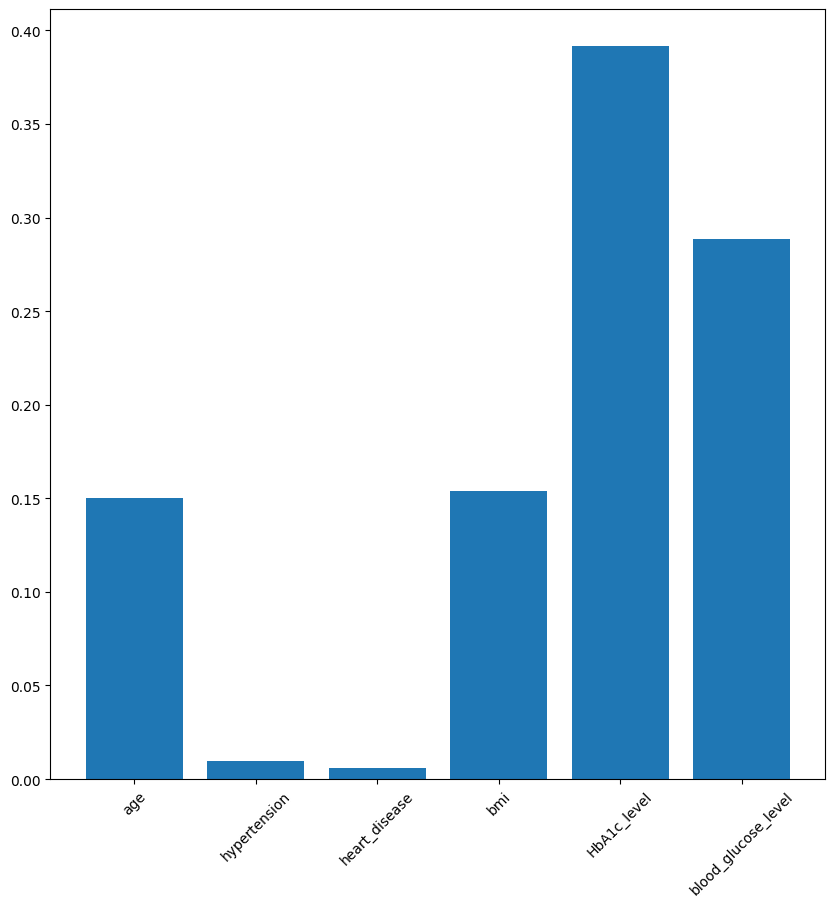

In [46]:
plt.figure(figsize=(10,10))
plt.bar(df.columns[0:6], RFC.feature_importances_)
plt.xticks(rotation=45)

In [49]:
# Признак - значимость
l = np.vstack([RFC.feature_importances_, df.columns[0:6]]).T

In [50]:
# Сортировка по значимости
sorted(l, key = lambda student: student[0], reverse=True)

[array([0.3917734584858907, 'HbA1c_level'], dtype=object),
 array([0.2887215306127212, 'blood_glucose_level'], dtype=object),
 array([0.15409013572691455, 'bmi'], dtype=object),
 array([0.15026050683347436, 'age'], dtype=object),
 array([0.00943553522405245, 'hypertension'], dtype=object),
 array([0.005718833116946596, 'heart_disease'], dtype=object)]

Как мы видим из значимости признаков именно уровень HbA1c (гемоглобина A1c) самый важный при определении диабета у человека, ведь это показатель среднего уровня сахара в крови человека за последние 2-3 месяца.

### Итого: классификатор RandomForest может определить диабет у человека по его показателям крови и т.д. с точностью 96,945%, что является достаточно хорошим результатом. Мы еще раз убедились, что именно сахар играет важнейшую роль в том, есть ли у человека сахарный диабет или нет. 